# Face Mask Detection using transfer Learning

The pictures are divided into two classes: with mask and without mask

### Import necessary modules and Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Fetch the Data

We will be only taking 1000 images to reduce training time

In [2]:
with_mask = glob('with_mask 1/with_mask 1/*.jpg')[0:500]
without_mask = glob('without_mask/without_mask/*.jpg')[0:500]

### Check the no of images

In [3]:
print("Number of images with_mask are:",len(with_mask))
print("Number of images without_mask are:",len(without_mask))

Number of images with_mask are: 500
Number of images without_mask are: 500


### Create a list with the images and a seperate one with its corresponding labels.

In [4]:
images = []
labels = []

for i in with_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in without_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

### Shuffle the images

In [5]:
images,labels = shuffle(images, labels)

### Plotting some of the images

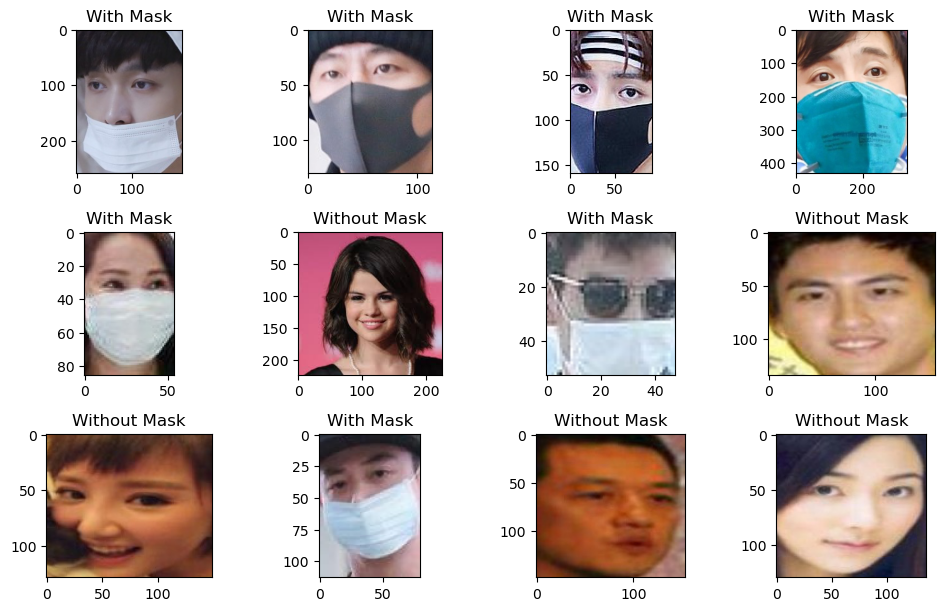

In [6]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    if labels[i] == 0:
        plt.title('With Mask')
    else:
        plt.title('Without Mask')
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [7]:
X = []
for i in images:
    X.append(resize(i, (224, 224, 3)))
X = np.array(X)

### Plot some of the images after resizing

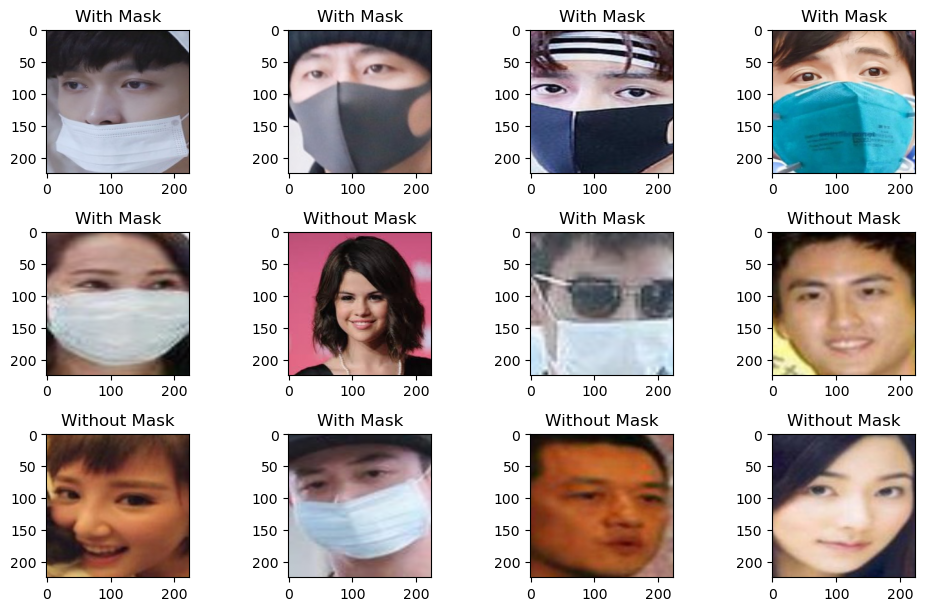

In [8]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    if labels[i] == 0:
        plt.title('With Mask')
    else:
        plt.title('Without Mask')
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [9]:
y = np.array(labels)

### Splitting into training and testing data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Loading the pretrained model

In [11]:
from keras.applications import MobileNetV2

weights='imagenet': Loads the pre-trained weights on the ImageNet dataset.
----Include_top=False: Excludes the final classification layers (meant for 1000 ImageNet classes). This gives you a feature extractor model that can extract useful features from your images.

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [12]:
X_train.shape

(800, 224, 224, 3)

In [13]:
len(y_train)

800

In [14]:
X_test.shape

(200, 224, 224, 3)

In [15]:
y_test.shape

(200,)

In [16]:
mobilenet_model = MobileNetV2(input_shape = (224, 224,3), include_top=False)

In [17]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [32]:
model = Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

### Compile Transfer Learning Model

In [34]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Train the model

In [35]:
X_train.shape

(800, 224, 224, 3)

In [36]:
y_train.shape

(800,)

In [37]:
model.fit(X_train,y_train,epochs=10, validation_split=0.05)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.9104 - loss: 0.2074 - val_accuracy: 0.6250 - val_loss: 7.7328
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9878 - loss: 0.0499 - val_accuracy: 0.9750 - val_loss: 0.0527
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9889 - loss: 0.0280 - val_accuracy: 0.5750 - val_loss: 12.7634
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 1.0000 - loss: 8.3122e-04 - val_accuracy: 0.6500 - val_loss: 5.7910
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9959 - loss: 0.0186 - val_accuracy: 0.5000 - val_loss: 24.8311
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9985 - loss: 0.0079 - val_accuracy: 0.5500 - val_loss: 15.3585
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 1.0000 - loss: 5.4693e-04 - val_accuracy: 0.5250 - val_loss: 16.3502
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 1.0000 - loss: 6.8986e-05 - val_accuracy: 0

### Make predictions using x_test

In [39]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step 


In [42]:
y_pred=[np.argmax(i) for i in y_pred]

In [43]:
accuracy_score(y_test,y_pred)

0.485

### Plot a heatmap

<Axes: >

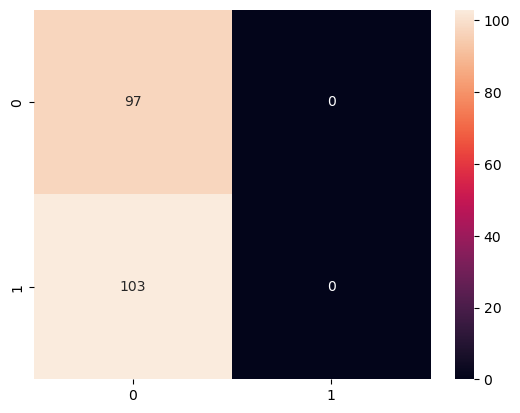

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

***